In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

def check_NaN(dataframe):
    print("Total NaN:", dataframe.isnull().values.sum())
    print("NaN by column:\n",dataframe.isnull().sum())
    return

In [2]:
data = pd.read_csv("./data/Plants_Dataset.csv")
data.head()
#data.describe()

,Site,height,mouth_diam,tube_diam,keel_diam,wingspread,hoodarea,wingarea,tubearea,tubemass_g,wingmass_g,Ca_ppm,P_ppm,K_ppm,Mg_ppm,C_pct,H_pct,N_pct
0,TJH,654,38.4,16.6,6.4,55,63.77,33.65,87.15,3.54,0.29,717.90,997.12,10699.50,1983.40,49.43,5.50,0.93
1,TJH,413,22.2,17.2,5.9,60,21.10,7.36,44.78,1.48,0.06,392.74,876.99,9576.49,1540.73,50.24,5.63,0.94
2,TJH,610,31.2,19.9,6.7,78,28.47,15.75,56.64,2.20,0.16,402.45,1287.62,11738.73,1514.21,50.77,5.58,1.08
3,TJH,546,34.4,20.8,6.3,95,48.82,30.47,76.31,2.95,0.24,497.16,662.55,11173.37,1399.24,50.27,5.67,0.88
4,TJH,665,30.5,20.4,6.6,30,29.48,11.33,100.22,3.36,0.08,504.48,1115.53,7017.39,1964.15,50.20,5.56,0.98


In [3]:
def check_NaN(dataframe):
    print("Total NaN:", dataframe.isnull().values.sum())
    print("NaN by column:\n",dataframe.isnull().sum())
    return
    
check_NaN(data)

Total NaN: 0
NaN by column:
 Site          0
height        0
mouth_diam    0
tube_diam     0
keel_diam     0
wingspread    0
hoodarea      0
wingarea      0
tubearea      0
tubemass_g    0
wingmass_g    0
Ca_ppm        0
P_ppm         0
K_ppm         0
Mg_ppm        0
C_pct         0
H_pct         0
N_pct         0
dtype: int64


In [4]:
#Determining the best data points to use... THIS WHOLE SECTION MIGHT BREAK ALL THE WORKING CODE PROCEED WITH CAUTION
data.target = data.Site
columns = data.columns
best_accuracy = 0
best_f1 = 0
best_f2 = 0

print("RUN")
#Loop through all features
for f1 in range(1,len(columns)):
    for f2 in range(1,len(columns)):
        if f1 == f2:
            continue
        #print("f1: ", f1, ". f2: " , f2)
        #Set the columns from our data to use
        data.features = data[[columns[f1],columns[f2]]]
        #Process the data to the right format for the KNN classifier
        data.features = preprocessing.MinMaxScaler().fit_transform(data.features)
        #Train
        x_train, x_test, y_train, y_test = train_test_split(data.features,data.target, test_size=0.2,random_state=42)
        #Find optimal K value?
        k_scores = []
        #The K can go all the way to 73, though this increases the processing time to a ridiculous amount
        #Instead I opted to use all data with n_neighbours of a static 5

        ##############################
        ############################
        ############################
        ###########################
        #REMEMBER TO BUMP THIS BACK TO 5 BEFORE SUBMITTING
        for k in range(1,3):
            knn = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(knn,data.features,data.target,cv=10,scoring='accuracy')
            k_scores.append(scores.mean())
            
        optimal_k = np.argmax(k_scores)  
        print("Optimal k with cross-validation: ", np.argmax(k_scores))
        if optimal_k == 0:
            continue

        #Run the classifier with optimal K
        classifier = KNeighborsClassifier(optimal_k)
        classifier.fit(x_train, y_train)
        predictions = classifier.predict(x_test)

        #Display the accuracy found
        #accuracy = str(accuracy_score(y_test, predictions)*100)+"%"
        accuracy = accuracy_score(y_test, predictions)*100
        #print("Accuracy:", accuracy)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_f1 = f1
            best_f2 = f2

print("Best accuracy: ", best_accuracy, ". Feature A: ", best_f1, ". Feature 2: ", best_f2, ".")

C:\Users\ioemaster\AppData\Local\Temp\ipykernel_2852\107283896.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.target = data.Site
C:\Users\ioemaster\AppData\Local\Temp\ipykernel_2852\107283896.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.features = data[[columns[f1],columns[f2]]]


RUN
Optimal k with cross-validation:  1
Optimal k with cross-validation:  0
Optimal k with cross-validation:  0
Optimal k with cross-validation:  1
Optimal k with cross-validation:  0
Optimal k with cross-validation:  0
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  0
Optimal k with cross-validation:  1
Optimal k with cross-validation:  0
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  0
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-val

Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  0
Optimal k with cross-validation:  1
Optimal k with cross-validation:  0
Optimal k with cross-validation:  0
Optimal k with cross-validation:  1
Optimal k with cross-validation:  0
Optimal k with cross-validation:  0
Optimal k with cross-validation:  0
Optimal k with cross-validation:  0
Optimal k with cross-validation:  0
Optimal k with cross-validation:  0
Optimal k with cross-validation:  0
Optimal k with cross-validation:  0
Optimal k with cross-validation:  0
Optimal k with cross-validation:  0
Optimal k with cross-validation:  0
Optimal k with cross-validation:  0
Optimal k with cross-validation:  0
Optimal k with cross-validation:  0
Optimal k with cross-validation:  0
Optimal k with cross-validation:  0
Optimal k with cross-validat

In [5]:
#Get the column titles as a text array
column_titles = list(data.columns.values)

In [6]:
#data.features = data[[columns[best_f1],columns[best_f2]]]
data.features = data[[column_titles[best_f1],column_titles[best_f2]]]
data.features.head()

,wingmass_g,P_ppm
0,0.29,997.12
1,0.06,876.99
2,0.16,1287.62
3,0.24,662.55
4,0.08,1115.53


In [7]:
#The data has a Site column that is strings instead of ints compared to the demo data. That can be swapped with this function
data['Site_int'] = pd.factorize(data.Site)[0]
print(data.Site_int)

0     0
1     0
2     0
3     0
4     0
     ..
75    3
76    3
77    3
78    3
79    3
Name: Site_int, Length: 80, dtype: int64


In [8]:
#View the new column
#data.head()

In [9]:
data.target = data.Site_int
#data.features.head()
#data.target.head()

In [10]:
print(data.features)

    wingmass_g    P_ppm
0         0.29   997.12
1         0.06   876.99
2         0.16  1287.62
3         0.24   662.55
4         0.08  1115.53
..         ...      ...
75        0.06  1147.68
76        0.06  1453.79
77        0.03  1333.58
78        0.04  1233.92
79        0.05  1085.00

[80 rows x 2 columns]


In [11]:
data.features = preprocessing.MinMaxScaler().fit_transform(data.features)

In [12]:
#Convert column strings to ID of string
#data['site_id'] = pd.factorize(data['Site'])[0]
#print(data['site_id'])
#data.head()

#Convert column strings to array of unique items
targets_list = data['Site'].unique()
print(targets_list)

['TJH' 'DG' 'LEH' 'HD']


In [13]:
x_train, x_test, y_train, y_test = train_test_split(data.features,data.target, test_size=0.2,random_state=42)

In [14]:
#Check our K scores like in the demo...............

k_scores = []

#I determined 73 was the maximum neibours that could be checked when reading...
#the error log to see where it crashed earlier
#K was only checked up to 5 when determining which features to use...
#but now that we have made a decision, a more thorough check can be made without...
#Spending too much time on calculations
for k in range(1,73):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,data.features,data.target,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
    
optimal_k = np.argmax(k_scores)    
print("Optimal k with cross-validation: ", np.argmax(k_scores))  

Optimal k with cross-validation:  8


In [15]:
classifier = KNeighborsClassifier(optimal_k)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

Text(0.5, 1.0, '3-Fold Testing')

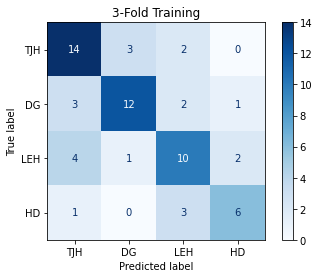

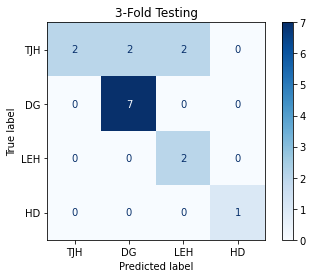

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay 
#Create target list

#Plot the trainin data results
target_list = data['Site'].unique()

# Plot the confusion matrices
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay.from_estimator(classifier, x_train, y_train,
                                 display_labels=target_list,
                                 cmap=plt.cm.Blues,ax=ax)
ax.set_title('3-Fold Training')

# Plot the confusion matrices
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test,
                                 display_labels=target_list,
                                 cmap=plt.cm.Blues,ax=ax)
ax.set_title('3-Fold Testing')

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

#################################################################TJH
#Get the true false for each test item being site TJH

y_test_TJH = (y_test == 0)
#Get the items that are predicted as TJH by the classifier
predictions_TJH = (predictions == 0)
#We now have an array for TJH test items, and TJH predictions
precision_TJH = (precision_score(y_test_TJH, predictions_TJH))*100
recall_TJH = (recall_score(y_test_TJH, predictions_TJH))*100
f1_TJH = (f1_score(y_test_TJH, predictions_TJH))*100

#################################################################DG

#Get the true false for each test item being site DG
y_test_DG = (y_test == 1)
#Get the items that are predicted as DG by the classifier
predictions_DG = (predictions == 1)
precision_DG = (precision_score(y_test_DG, predictions_DG))*100
recall_DG = (recall_score(y_test_DG, predictions_DG))*100
f1_DG = (f1_score(y_test_DG, predictions_DG))*100

#################################################################LEH

#Get the true false for each test item being site LEH
y_test_LEH = (y_test == 2)
#Get the items that are predicted as LEH by the classifier
predictions_LEH = (predictions == 2)
precision_LEH = (precision_score(y_test_LEH, predictions_LEH))*100
recall_LEH = (recall_score(y_test_LEH, predictions_LEH))*100
f1_LEH = (f1_score(y_test_LEH, predictions_LEH))*100

#################################################################HD

#Get the true false for each test item being site HD
y_test_HD = (y_test == 3)
#Get the items that are predicted as HD by the classifier
predictions_HD = (predictions == 3)
precision_HD = (precision_score(y_test_HD, predictions_HD))*100
recall_HD = (recall_score(y_test_HD, predictions_HD))*100
f1_HD = (f1_score(y_test_HD, predictions_HD))*100



print("Precision Score\n")
print("The precision score tells us the percent of positive predictions, that were correct")
print("TJH Precision score   : ", precision_TJH, "%")
print("DG Precision score    : ", precision_DG, "%")
print("LEH Precision score   : ", precision_LEH, "%")
print("HD Recall score       : ", precision_HD, "%")

print("\nRecall Score\n")
print("The recall score tells us..........")
print("TJH Recall score      : ", recall_TJH, "%")
print("DG Recall score       : ", recall_DG, "%")
print("LEH Recall score      : ", recall_LEH, "%")
print("HD Recall score       : ", recall_HD, "%")

print("\nF1 Score\n")
print("The F1 score tells us .............")
print("TJH F1 score          : ", f1_TJH, "%")
print("DG F1 score           : ", f1_DG, "%")
print("LEH F1 score          : ", f1_LEH, "%")
print("HD F1 score           : ", f1_HD, "%")

Precision Score

The precision score tells us the percent of positive predictions, that were correct
TJH Precision score   :  100.0 %
DG Precision score    :  77.77777777777779 %
LEH Precision score   :  50.0 %
HD Recall score       :  100.0 %

Recall Score

The recall score tells us..........
TJH Recall score      :  33.33333333333333 %
DG Recall score       :  100.0 %
LEH Recall score      :  100.0 %
HD Recall score       :  100.0 %

F1 Score

The F1 score tells us .............
TJH F1 score          :  50.0 %
DG F1 score           :  87.50000000000001 %
LEH F1 score          :  66.66666666666666 %
HD F1 score           :  100.0 %


In [18]:
#I Also came across this auto-reporter which does a full calculation for all these details in a neat little graph!
#You can reference the results above to confirm that both outputs are reaching the same conclusions
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=target_list, output_dict= False))

              precision    recall  f1-score   support

         TJH       1.00      0.33      0.50         6
          DG       0.78      1.00      0.88         7
         LEH       0.50      1.00      0.67         2
          HD       1.00      1.00      1.00         1

    accuracy                           0.75        16
   macro avg       0.82      0.83      0.76        16
weighted avg       0.84      0.75      0.72        16



In [19]:
#Construct a ROC curve for each class and calculate the respective AUC values

from sklearn.model_selection import cross_val_predict
y_train_TJH = (y_train == 0)
y_train_DG = (y_train == 1)
y_train_LEH = (y_train == 2)
y_train_HD = (y_train == 3)

y_scores_TJH = cross_val_predict(classifier, x_train, y_train_TJH, cv=3)
y_scores_DG = cross_val_predict(classifier, x_train, y_train_DG, cv=3)
y_scores_LEH = cross_val_predict(classifier, x_train, y_train_LEH, cv=3)
y_scores_HD = cross_val_predict(classifier, x_train, y_train_HD, cv=3)



def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])


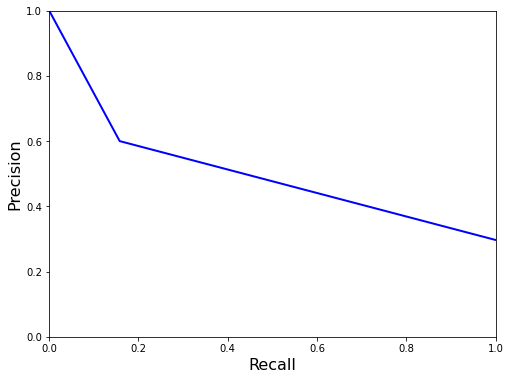

In [20]:
#Roc Curve
from sklearn.metrics import precision_recall_curve
precisions_TJH, recalls_TJH, thresholds_TJH = precision_recall_curve(y_train_TJH, y_scores_TJH)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_TJH, recalls_TJH)
plt.show()

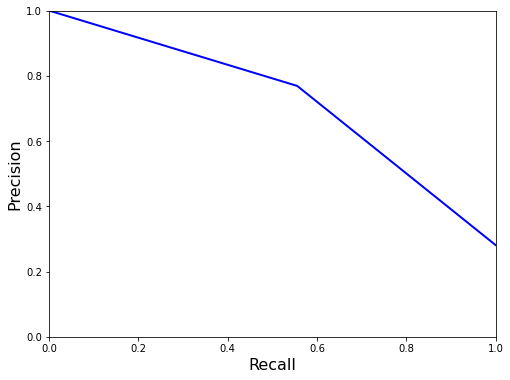

In [21]:
#Roc Curve
precisions_DG, recalls_DG, thresholds_DG = precision_recall_curve(y_train_DG, y_scores_DG)
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_DG, recalls_DG)
plt.show()

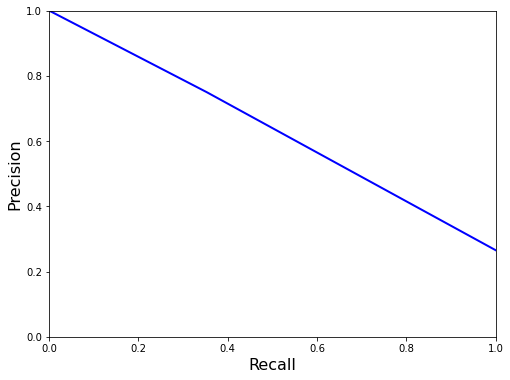

In [22]:
#Roc Curve
precisions_LEH, recalls_LEH, thresholds_LEH = precision_recall_curve(y_train_LEH, y_scores_LEH)
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_LEH, recalls_LEH)
plt.show()

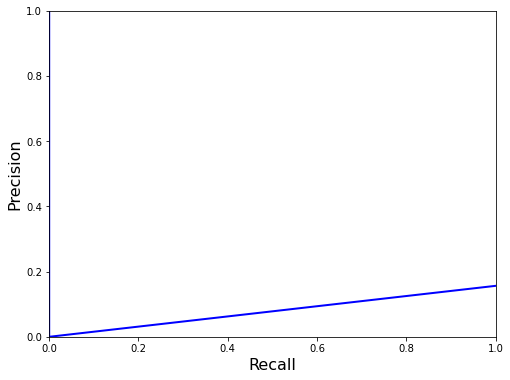

In [23]:
#Roc Curve
precisions_HD, recalls_HD, thresholds_HD = precision_recall_curve(y_train_HD, y_scores_HD)
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_HD, recalls_HD)
plt.show()

In [24]:
print(predictions)
print(y_test.to_numpy())

[1 1 0 1 2 1 0 3 2 1 1 1 2 1 2 1]
[1 0 0 1 0 1 0 3 0 0 1 1 2 1 2 1]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

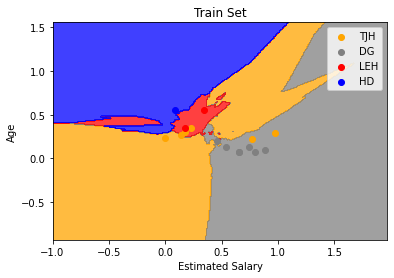

In [25]:
from matplotlib.colors import *

xs, ys = x_test, y_test

X1, X2 = np.meshgrid(np.arange(start = xs[:,0].min() - 1,stop = xs[:,0].max() + 1,step = 0.01),
                     np.arange(start = xs[:,1].min() - 1,stop = xs[:,1].max() + 1,step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(['orange','grey','red','blue']))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i, j in enumerate(np.unique(ys)):
    plt.scatter(xs[ys==j,0],xs[ys==j,1],
                c=ListedColormap(['orange','grey','red','blue'])(i),label = target_list[j])

plt.title('Train Set')
plt.xlabel('Estimated Salary')
plt.ylabel('Age')
plt.legend()
plt.show()